In [80]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.utils import plot_model
import keras
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

In [3]:
df = pd.read_csv("Data/credit_card_transactions-ibm_v2-001.csv")

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [4]:
df.drop("Is Fraud?", axis=1, inplace=True)
df

,User,Card,Year,Month,Day,Time,Amount,Use Chip,Merchant Name,Merchant City,Merchant State,Zip,MCC,Errors?,Is Fraud?
0,0,0,2002,9,1,06:21,$134.09,Swipe Transaction,3527213246127876953,La Verne,CA,91750.0,5300,NaN,No
1,0,0,2002,9,1,06:42,$38.48,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
2,0,0,2002,9,2,06:22,$120.34,Swipe Transaction,-727612092139916043,Monterey Park,CA,91754.0,5411,NaN,No
3,0,0,2002,9,2,17:45,$128.95,Swipe Transaction,3414527459579106770,Monterey Park,CA,91754.0,5651,NaN,No
4,0,0,2002,9,3,06:23,$104.71,Swipe Transaction,5817218446178736267,La Verne,CA,91750.0,5912,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24386895,1999,1,2020,2,27,22:23,$-54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386896,1999,1,2020,2,27,22:24,$54.00,Chip Transaction,-5162038175624867091,Merrimack,NH,3054.0,5541,NaN,No
24386897,1999,1,2020,2,28,07:43,$59.15,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No
24386898,1999,1,2020,2,28,20:10,$43.12,Chip Transaction,2500998799892805156,Merrimack,NH,3054.0,4121,NaN,No


In [ ]:
df.drop(["Merchant Name", "Zip", "Errors", "Use Chip"])

In [5]:
users = pd.read_csv("Data/sd254_users.csv")
users

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,Zipcode,Latitude,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,91750,34.15,-117.76,$29278,$59696,$127613,787,5
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,11363,40.76,-73.74,$37891,$77254,$191349,701,5
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,91792,34.02,-117.89,$22681,$33483,$196,698,5
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,10069,40.71,-73.99,$163145,$249925,$202328,722,4
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,94117,37.76,-122.44,$53797,$109687,$183855,675,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,11520,40.65,-73.58,$23550,$48010,$87837,703,3
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,41051,38.95,-84.54,$24218,$49378,$104480,740,4
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,7201,40.66,-74.19,$15175,$30942,$71066,779,3
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,17011,40.24,-76.92,$25336,$54654,$27241,618,1


In [6]:
amount = pd.read_csv("Data/ml_dataset.csv")
amount

,User,Card,Year,Month,Day,Amount,Hour,Minutes
0,0,0,2002,9,1,134.09,6,21
1,0,0,2002,9,1,38.48,6,42
2,0,0,2002,9,2,120.34,6,22
3,0,0,2002,9,2,128.95,17,45
4,0,0,2002,9,3,104.71,6,23
...,...,...,...,...,...,...,...,...
24357138,1999,1,2020,2,27,-54.00,22,23
24357139,1999,1,2020,2,27,54.00,22,24
24357140,1999,1,2020,2,28,59.15,7,43
24357141,1999,1,2020,2,28,43.12,20,10


In [7]:


# Convert 'Year', 'Month', and 'Day' columns to a single datetime column for easier manipulation
amount['Date'] = pd.to_datetime(amount[['Year', 'Month', 'Day']])

# Extract Year-Month for grouping
amount['YearMonth'] = amount['Date'].dt.to_period('M')

# Group by User and YearMonth, then sum the transaction amounts
monthly_transactions = amount.groupby(['User', 'YearMonth'])['Amount'].sum().reset_index()

# Calculate the average monthly transactions amount for each user
average_monthly_transactions = monthly_transactions.groupby('User')['Amount'].mean().reset_index()

# Rename the columns for clarity
average_monthly_transactions.columns = ['User', 'AverageMonthlyAmount']

# Display the result
print(average_monthly_transactions)


      User  AverageMonthlyAmount
0        0           7716.068619
1        1           3581.491300
2        2           6812.896296
3        3           7540.298854
4        4           7371.912582
...    ...                   ...
1995  1995           2229.257628
1996  1996           3369.695229
1997  1997           3028.335129
1998  1998           3514.276598
1999  1999           8057.030571

[2000 rows x 2 columns]


In [16]:
average_monthly_transactions.describe()

,User,AverageMonthlyAmount
count,2000.000000,2000.000000
mean,999.500000,3810.796737
std,577.494589,2361.340156
min,0.000000,68.165000
25%,499.750000,2216.710528
50%,999.500000,3234.777190
75%,1499.250000,4821.214770
max,1999.000000,20507.203350


In [14]:
monthly_transactions[monthly_transactions["User"]==0]["Amount"].sum()

1620374.4100000001

In [15]:
monthly_transactions

,User,YearMonth,Amount
0,0,2002-09,7293.44
1,0,2002-10,6957.09
2,0,2002-11,7257.44
3,0,2002-12,6383.49
4,0,2003-01,10133.14
...,...,...,...
267645,1999,2019-10,7188.98
267646,1999,2019-11,8544.78
267647,1999,2019-12,9792.94
267648,1999,2020-01,7784.13


In [8]:
amount

,User,Card,Year,Month,Day,Amount,Hour,Minutes,Date,YearMonth
0,0,0,2002,9,1,134.09,6,21,2002-09-01,2002-09
1,0,0,2002,9,1,38.48,6,42,2002-09-01,2002-09
2,0,0,2002,9,2,120.34,6,22,2002-09-02,2002-09
3,0,0,2002,9,2,128.95,17,45,2002-09-02,2002-09
4,0,0,2002,9,3,104.71,6,23,2002-09-03,2002-09
...,...,...,...,...,...,...,...,...,...,...
24357138,1999,1,2020,2,27,-54.00,22,23,2020-02-27,2020-02
24357139,1999,1,2020,2,27,54.00,22,24,2020-02-27,2020-02
24357140,1999,1,2020,2,28,59.15,7,43,2020-02-28,2020-02
24357141,1999,1,2020,2,28,43.12,20,10,2020-02-28,2020-02


In [17]:
user_transactions = amount.groupby('User').agg(
    TotalAmount=pd.NamedAgg(column='Amount', aggfunc='sum'),
    NumberOfTransactions=pd.NamedAgg(column='Amount', aggfunc='count'),
    AverageTransactionAmount=pd.NamedAgg(column='Amount', aggfunc='mean')
).reset_index()

In [18]:
user_transactions

,User,TotalAmount,NumberOfTransactions,AverageTransactionAmount
0,0,1620374.41,19936,81.278813
1,1,716298.26,8886,80.609752
2,2,1471585.60,41934,35.092898
3,3,1183826.92,10097,117.245412
4,4,1798746.67,18540,97.019777
...,...,...,...,...
1995,1995,347764.19,14701,23.655819
1996,1996,734593.56,17962,40.897092
1997,1997,702573.75,21587,32.546150
1998,1998,340884.83,5782,58.956214


In [20]:
data = pd.concat([users, user_transactions], axis=1)
data

,Person,Current Age,Retirement Age,Birth Year,Birth Month,Gender,Address,Apartment,City,State,...,Longitude,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,User,TotalAmount,NumberOfTransactions,AverageTransactionAmount
0,Hazel Robinson,53,66,1966,11,Female,462 Rose Lane,NaN,La Verne,CA,...,-117.76,$29278,$59696,$127613,787,5,0,1620374.41,19936,81.278813
1,Sasha Sadr,53,68,1966,12,Female,3606 Federal Boulevard,NaN,Little Neck,NY,...,-73.74,$37891,$77254,$191349,701,5,1,716298.26,8886,80.609752
2,Saanvi Lee,81,67,1938,11,Female,766 Third Drive,NaN,West Covina,CA,...,-117.89,$22681,$33483,$196,698,5,2,1471585.60,41934,35.092898
3,Everlee Clark,63,63,1957,1,Female,3 Madison Street,NaN,New York,NY,...,-73.99,$163145,$249925,$202328,722,4,3,1183826.92,10097,117.245412
4,Kyle Peterson,43,70,1976,9,Male,9620 Valley Stream Drive,NaN,San Francisco,CA,...,-122.44,$53797,$109687,$183855,675,1,4,1798746.67,18540,97.019777
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,70,1987,7,Male,6577 Lexington Lane,9.0,Freeport,NY,...,-73.58,$23550,$48010,$87837,703,3,1995,347764.19,14701,23.655819
1996,Ximena Richardson,62,65,1957,11,Female,2 Elm Drive,955.0,Independence,KY,...,-84.54,$24218,$49378,$104480,740,4,1996,734593.56,17962,40.897092
1997,Annika Russell,47,67,1973,1,Female,276 Fifth Boulevard,NaN,Elizabeth,NJ,...,-74.19,$15175,$30942,$71066,779,3,1997,702573.75,21587,32.546150
1998,Juelz Roman,66,60,1954,2,Male,259 Valley Boulevard,NaN,Camp Hill,PA,...,-76.92,$25336,$54654,$27241,618,1,1998,340884.83,5782,58.956214


In [26]:
data_cleaned = data.drop(["Retirement Age", "Birth Year", "Birth Month", "Address", "Apartment",
                          "Zipcode", "Latitude", "Longitude", "User", "City"], axis=1)

In [27]:
data_cleaned

,Person,Current Age,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,TotalAmount,NumberOfTransactions,AverageTransactionAmount
0,Hazel Robinson,53,Female,CA,$29278,$59696,$127613,787,5,1620374.41,19936,81.278813
1,Sasha Sadr,53,Female,NY,$37891,$77254,$191349,701,5,716298.26,8886,80.609752
2,Saanvi Lee,81,Female,CA,$22681,$33483,$196,698,5,1471585.60,41934,35.092898
3,Everlee Clark,63,Female,NY,$163145,$249925,$202328,722,4,1183826.92,10097,117.245412
4,Kyle Peterson,43,Male,CA,$53797,$109687,$183855,675,1,1798746.67,18540,97.019777
...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jose Faraday,32,Male,NY,$23550,$48010,$87837,703,3,347764.19,14701,23.655819
1996,Ximena Richardson,62,Female,KY,$24218,$49378,$104480,740,4,734593.56,17962,40.897092
1997,Annika Russell,47,Female,NJ,$15175,$30942,$71066,779,3,702573.75,21587,32.546150
1998,Juelz Roman,66,Male,PA,$25336,$54654,$27241,618,1,340884.83,5782,58.956214


In [28]:
data_cleaned.to_csv("Data/predictions.csv")

In [35]:
df = data_cleaned.drop(["TotalAmount", "NumberOfTransactions", "Person"], axis=1)
df['Total Debt'] = df['Total Debt'].str.replace('$', '').astype(float)
df['Per Capita Income - Zipcode'] = df['Per Capita Income - Zipcode'].str.replace('$', '').astype(float)
df['Yearly Income - Person'] = df['Yearly Income - Person'].str.replace('$', '').astype(float)
df

C:\Users\admin\AppData\Local\Temp\ipykernel_31068\1536661156.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Total Debt'] = df['Total Debt'].str.replace('$', '').astype(float)
C:\Users\admin\AppData\Local\Temp\ipykernel_31068\1536661156.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Per Capita Income - Zipcode'] = df['Per Capita Income - Zipcode'].str.replace('$', '').astype(float)
C:\Users\admin\AppData\Local\Temp\ipykernel_31068\1536661156.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['Yearly 

,Current Age,Gender,State,Per Capita Income - Zipcode,Yearly Income - Person,Total Debt,FICO Score,Num Credit Cards,AverageTransactionAmount
0,53,Female,CA,29278.0,59696.0,127613.0,787,5,81.278813
1,53,Female,NY,37891.0,77254.0,191349.0,701,5,80.609752
2,81,Female,CA,22681.0,33483.0,196.0,698,5,35.092898
3,63,Female,NY,163145.0,249925.0,202328.0,722,4,117.245412
4,43,Male,CA,53797.0,109687.0,183855.0,675,1,97.019777
...,...,...,...,...,...,...,...,...,...
1995,32,Male,NY,23550.0,48010.0,87837.0,703,3,23.655819
1996,62,Female,KY,24218.0,49378.0,104480.0,740,4,40.897092
1997,47,Female,NJ,15175.0,30942.0,71066.0,779,3,32.546150
1998,66,Male,PA,25336.0,54654.0,27241.0,618,1,58.956214


In [38]:
X = df.drop('AverageTransactionAmount', axis=1)
y = df['AverageTransactionAmount']
np.array(X)

array([[53, 'Female', 'CA', ..., 127613.0, 787, 5],
       [53, 'Female', 'NY', ..., 191349.0, 701, 5],
       [81, 'Female', 'CA', ..., 196.0, 698, 5],
       ...,
       [47, 'Female', 'NJ', ..., 71066.0, 779, 3],
       [66, 'Male', 'PA', ..., 27241.0, 618, 1],
       [21, 'Female', 'NH', ..., 181261.0, 673, 2]], dtype=object)

In [67]:
def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Neural Network baseline

In [68]:
X = df.drop('AverageTransactionAmount', axis=1)
y = df['AverageTransactionAmount']

# List of numeric and categorical features
numeric_features = ['Current Age', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Num Credit Cards']
categorical_features = ['Gender', 'State']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)  # Ensure output is dense

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform X_train and X_test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the neural network model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1)  # Output layer with linear activation (for regression)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error', metrics=[RootMeanSquaredError(), 'mape'])

# Print model summary
model.summary()

# Plot the model architecture (optional)
# plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAPE: {mape:.2f}%')

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')

plt.show()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_103 (Dense)           (None, 64)                3712      
                                                                 
 dense_104 (Dense)           (None, 32)                2080      
                                                                 
 dense_105 (Dense)           (None, 1)                 33        
                                                                 
Total params: 5,825
Trainable params: 5,825
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50


c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


40/40 [==============================] - 1s 7ms/step - loss: 2142.0972 - root_mean_squared_error: 46.2828 - mape: 96.6911 - val_loss: 2151.6714 - val_root_mean_squared_error: 46.3861 - val_mape: 92.7572
Epoch 2/50
40/40 [==============================] - 0s 2ms/step - loss: 1756.4387 - root_mean_squared_error: 41.9099 - mape: 84.4640 - val_loss: 1529.2891 - val_root_mean_squared_error: 39.1061 - val_mape: 73.2093
Epoch 3/50
40/40 [==============================] - 0s 3ms/step - loss: 1012.0135 - root_mean_squared_error: 31.8122 - mape: 57.2900 - val_loss: 711.6334 - val_root_mean_squared_error: 26.6765 - val_mape: 44.2857
Epoch 4/50
40/40 [==============================] - 0s 3ms/step - loss: 447.5606 - root_mean_squared_error: 21.1556 - mape: 37.5962 - val_loss: 505.1353 - val_root_mean_squared_error: 22.4752 - val_mape: 39.8239
Epoch 5/50
40/40 [==============================] - 0s 3ms/step - loss: 357.3335 - root_mean_squared_error: 18.9033 - mape: 37.8613 - val_loss: 463.9732 - val

# Neural Network Hyperparameter Finetuning

In [69]:
X = df.drop('AverageTransactionAmount', axis=1)
y = df['AverageTransactionAmount']

# List of numeric and categorical features
numeric_features = ['Current Age', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Num Credit Cards']
categorical_features = ['Gender', 'State']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)  # Ensure output is dense

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the preprocessor on the training data and transform X_train and X_test
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

# Define the neural network model
def create_model(learning_rate=0.001, num_layers=2, num_units=64, activation='relu', optimizer='adam'):
    model = Sequential()
    model.add(Dense(num_units, activation=activation, input_shape=(X_train.shape[1],)))
    for _ in range(num_layers - 1):
        model.add(Dense(num_units, activation=activation))
    model.add(Dense(1))  # Output layer with linear activation
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mape'])
    return model

# Hyperparameters to tune
learning_rates = [0.001, 0.01]
num_layers = [2, 3]
num_units = [64, 128]
activations = ['relu', 'tanh']
batch_size = [32, 64]

# Perform grid search manually
best_mape = np.inf
best_hyperparameters = {}

for lr in learning_rates:
    for nl in num_layers:
        for nu in num_units:
            for act in activations:
                for bs in batch_size:
                    model = create_model(learning_rate=lr, num_layers=nl, num_units=nu, activation=act)
                    history = model.fit(X_train, y_train, epochs=50, batch_size=bs, validation_split=0.2, verbose=0)
                    mape = history.history['val_mape'][-1]  # Take last MAPE value from validation set
                    
                    if mape < best_mape:
                        best_mape = mape
                        best_hyperparameters = {'learning_rate': lr, 'num_layers': nl, 'num_units': nu, 'activation': act, 'batch_size': bs}

# Print the best hyperparameters found
print("Best Hyperparameters:")
print(best_hyperparameters)

# Evaluate the best model on the test se

c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


Best Hyperparameters:
{'learning_rate': 0.01, 'num_layers': 2, 'num_units': 64, 'activation': 'tanh', 'batch_size': 64}


TypeError: create_model() got an unexpected keyword argument 'batch_size'

In [74]:
best_model = create_model(learning_rate=best_hyperparameters['learning_rate'], num_layers=best_hyperparameters['num_layers'],
                           num_units=best_hyperparameters['num_units'], activation=best_hyperparameters['activation'])
history = best_model.fit(X_train, y_train, epochs=50, batch_size=best_hyperparameters['batch_size'], validation_split=0.2, verbose=0)
y_pred = best_model.predict(X_test).flatten()

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAPE: {mape:.2f}%')

13/13 [==============================] - 0s 4ms/step
Test RMSE: 16.63
Test MAPE: 33.77%


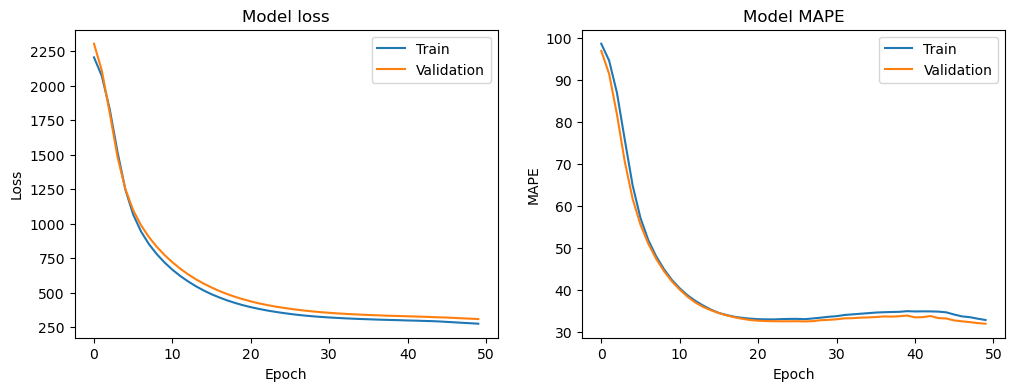

In [75]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')


plt.subplot(1, 2, 2)
plt.plot(history.history['mape'])
plt.plot(history.history['val_mape'])
plt.title('Model MAPE')
plt.ylabel('MAPE')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')


# Linear Regression

In [78]:
X = df.drop('AverageTransactionAmount', axis=1)
y = df['AverageTransactionAmount']

numeric_features = ['Current Age', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Num Credit Cards']
categorical_features = ['Gender', 'State']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)  # Ensure output is dense

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# Build the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predictions on the test set
y_pred = model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAPE: {mape:.2f}%')

Test RMSE: 14.91
Test MAPE: 34.45%


c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [82]:
X = df.drop('AverageTransactionAmount', axis=1)
y = df['AverageTransactionAmount']

numeric_features = ['Current Age', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Num Credit Cards']
categorical_features = ['Gender', 'State']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False)  # Ensure output is dense

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)
# Build the linear regression model
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False]
}

# Define MAPE as scoring metric
scoring = {
    'RMSE': make_scorer(mean_squared_error, greater_is_better=False),
    'MAPE': make_scorer(mean_absolute_percentage_error, greater_is_better=False)
}

# Perform Grid Search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring=scoring, refit='RMSE', verbose=1)
grid_search.fit(X_train, y_train)

# Print best parameters and results
print("Best parameters found:")
print(grid_search.best_params_)
print("Best RMSE score found:")
print(grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mape = mean_absolute_percentage_error(y_test, y_pred)

print(f'Test RMSE: {rmse:.2f}')
print(f'Test MAPE: {mape:.2f}%')

Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best parameters found:
{'fit_intercept': False}
Best RMSE score found:
-3.458144842175406e+24
Test RMSE: 14.91
Test MAPE: 34.44%


c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score


# Features and target variable
X = df.drop('AverageTransactionAmount', axis=1)
y = df['AverageTransactionAmount']

# List of numeric and categorical features
numeric_features = ['Current Age', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Num Credit Cards']
categorical_features = ['Gender', 'State']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')  # Handle unknown categories

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the Ridge regression model as part of a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', Ridge())
])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the model on the training data
model.fit(X_train, y_train)

# Predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error (MSE): {mse:.2f}')
print(f'Test Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Test R-squared (R2): {r2:.4f}')


Test Mean Squared Error (MSE): 221.67
Test Root Mean Squared Error (RMSE): 14.89
Test R-squared (R2): 0.3018


c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [61]:


# Features and target variable
X = df.drop('AverageTransactionAmount', axis=1)
y = df['AverageTransactionAmount']

# List of numeric and categorical features
numeric_features = ['Current Age', 'Per Capita Income - Zipcode', 'Yearly Income - Person', 'Total Debt', 'FICO Score', 'Num Credit Cards']
categorical_features = ['Gender', 'State']

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first', sparse=False, handle_unknown='ignore')  # Ensure output is dense

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define the linear regression model as part of a pipeline
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Define the parameter grid for GridSearchCV
param_grid = {  # Normalize the regressor
    'regressor__fit_intercept': [True, False]  # Include an intercept term
}

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform grid search with cross-validation
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score from the grid search
print("Best Parameters:", grid_search.best_params_)
print("Best CV Score (MSE):", -grid_search.best_score_)

# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error (MSE): {mse:.2f}')
print(f'Test Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'Test R-squared (R2): {r2:.4f}')


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'regressor__fit_intercept': True}
Best CV Score (MSE): 262.00954674176836
Test Mean Squared Error (MSE): 222.31
Test Root Mean Squared Error (RMSE): 14.91
Test R-squared (R2): 0.2998


c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\Users\admin\anaconda3\envs\py39\lib\site-packages\sklearn\preprocessing\_encoders.py:227: UserWarning: Found unknown categories in columns [1] durin